In [48]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.nan)
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
%pylab inline
exec(open("/Users/raghuramkowdeed/Documents/afp/get_signal_names.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/portfolio_optimizer.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/non_linear_signal.py").read())
import datetime


Populating the interactive namespace from numpy and matplotlib


In [2]:
sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'

In [3]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)

1980-01-31.csv
1980-02-29.csv
1980-03-31.csv
1980-04-30.csv
1980-05-30.csv
1980-06-30.csv
1980-07-31.csv
1980-08-29.csv
1980-09-30.csv
1980-10-31.csv
1980-11-28.csv
1980-12-31.csv
1981-01-30.csv
1981-02-27.csv
1981-03-31.csv
1981-04-30.csv
1981-05-29.csv
1981-06-30.csv
1981-07-31.csv
1981-08-31.csv
1981-09-30.csv
1981-10-30.csv
1981-11-30.csv
1981-12-31.csv
1982-01-29.csv
1982-02-26.csv
1982-03-31.csv
1982-04-30.csv
1982-05-28.csv
1982-06-30.csv
1982-07-30.csv
1982-08-31.csv
1982-09-30.csv
1982-10-29.csv
1982-11-30.csv
1982-12-31.csv
1983-01-31.csv
1983-02-28.csv
1983-03-31.csv
1983-04-29.csv
1983-05-31.csv
1983-06-30.csv
1983-07-29.csv
1983-08-31.csv
1983-09-30.csv
1983-10-31.csv
1983-11-30.csv
1983-12-30.csv
1984-01-31.csv
1984-02-29.csv
1984-03-30.csv
1984-04-30.csv
1984-05-31.csv
1984-06-29.csv
1984-07-31.csv
1984-08-31.csv
1984-09-28.csv
1984-10-31.csv
1984-11-30.csv
1984-12-31.csv
1985-01-31.csv
1985-02-28.csv
1985-03-29.csv
1985-04-30.csv
1985-05-31.csv
1985-06-28.csv
1985-07-31

In [4]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

In [15]:
sig_name = 'sp'
this_sig_sr = sig_df[sig_name]

In [16]:
this_sig_sr = this_sig_sr[ (this_sig_sr.index>=begin_date) & (this_sig_sr.index<end_date)]

In [7]:

pm = PortfolioOptimizer(fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/',
                        fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv',
                        fac_cov_hl = 12.0
                       )



--------


In [17]:
pnl_sr_1 = pm.run_signal(sig_sr=this_sig_sr,neu_sig=False)
pnl_sr_2 = pm.run_signal(sig_sr=this_sig_sr,neu_sig=True)

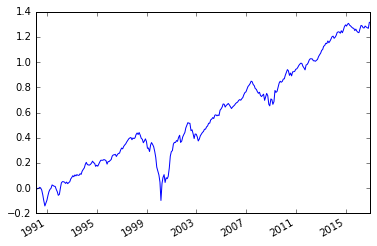

In [18]:
pnl_sr_1.cumsum().plot()

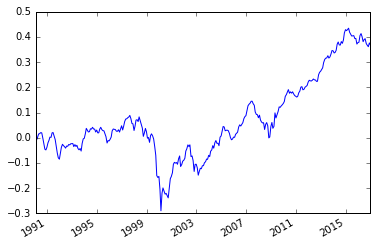

In [19]:
pnl_sr_2.cumsum().plot()

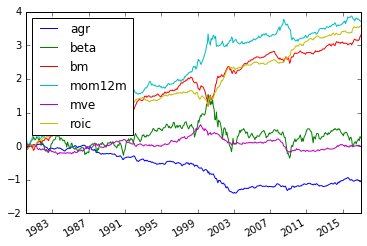

In [20]:
pm.fac_ret.cumsum().plot()

In [12]:
corr_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/knn_ic.csv')

In [21]:
corr_df.sort_values(['nl_corr'],ascending=False,)

,Unnamed: 0,comb_ic,l_corr,nl_corr,nl_l_corr
79,sfe,0.013062,-0.011096,0.029466,-0.270957
58,lev,0.022194,0.017059,0.023159,0.158849
72,roic,0.012835,0.001935,0.019775,-0.175760
90,roaq,0.010582,0.001903,0.019104,-0.153249
10,cashdebt,0.006238,-0.008054,0.018976,-0.103600
12,cfp,0.016721,0.006948,0.017900,0.047005
21,chpmia,0.014130,0.000754,0.017859,0.081557
13,cfp_ia,0.013165,-0.001137,0.017533,0.088340
7,bm,0.015656,0.009668,0.017506,0.123665
76,salerec,0.015411,0.002962,0.017313,-0.036368


In [86]:
sig_name = 'chpmia'
look_back = 3
this_sig_sr = sig_df[sig_name]
this_ret_sr = sig_df['ret']



In [87]:
l_sig_sr = get_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
nl_knn_sig_sr = get_knn_non_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
#nl_kernel_sig_sr = get_kernel_non_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr,look_back=look_back, gamma= 1.0)
print('------')

------


In [88]:
pnl_sr_l= pm.run_signal(sig_sr=l_sig_sr,neu_sig=True)
pnl_sr_knn = pm.run_signal(sig_sr=nl_knn_sig_sr,neu_sig=True)
#pnl_sr_kernel = pm.run_signal(sig_sr=nl_kernel_sig_sr,neu_sig=True)

In [89]:
plot_df = pd.DataFrame()
plot_df['lm'] = pnl_sr_l
plot_df['knn'] = pnl_sr_knn
#plot_df['kernel'] = pnl_sr_kernel

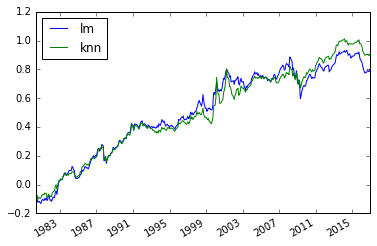

In [90]:
plot_df.cumsum().plot()